In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle
from sklearn.model_selection import GridSearchCV


In [48]:
from surprise import Dataset
from surprise import Reader

from surprise import SVD
from surprise import SVDpp
from surprise import NMF

from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import SlopeOne
from surprise import CoClustering
from surprise import NormalPredictor
from surprise import KNNWithZScore
from surprise import BaselineOnly

from surprise import accuracy

from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate


from surprise import Reader, Dataset, SVD, SVDpp, NMF, KNNBaseline, evaluate, accuracy
from surprise.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression



In [49]:
def dateparse (time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))

In [50]:
rating_data = pd.read_csv('../Data/ratings.csv',parse_dates=True,index_col='timestamp',date_parser=dateparse)
rating_data_train = pd.read_csv('../Data/ratings_train.csv')
rating_data_test = pd.read_csv('../Data/ratings_test.csv')

In [51]:
rating_data.sort_values(by='timestamp').head()

,userId,movieId,rating
timestamp,,,
1996-03-29 15:36:55,429,595,5.0
1996-03-29 15:36:55,429,588,5.0
1996-03-29 15:36:55,429,590,5.0
1996-03-29 15:36:55,429,592,5.0
1996-03-29 15:36:55,429,432,3.0


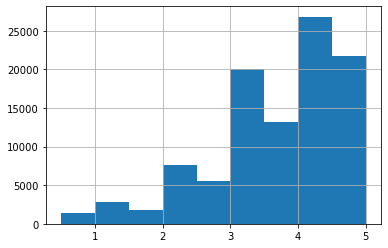

In [52]:
rating_data['rating'].hist(bins=9)

In [53]:
# rating_data.loc[rating_data['userId']==514].sort_values(by='timestamp').head()

In [54]:
len(rating_data['userId'].unique())

610

In [55]:
# index_split = round(len(rating_data)*0.75)
# train_rating_data = rating_data[:index_split].copy()
# test_rating_data = rating_data[index_split:].copy()

In [56]:
# train_rating_data.head()

In [57]:
# test_rating_data.head()

In [58]:
movies = pd.read_csv('../Data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [59]:
rating_dist = rating_data['rating'].value_counts()
list(rating_dist.index)

[4.0, 3.0, 5.0, 3.5, 4.5, 2.0, 2.5, 1.0, 1.5, 0.5]

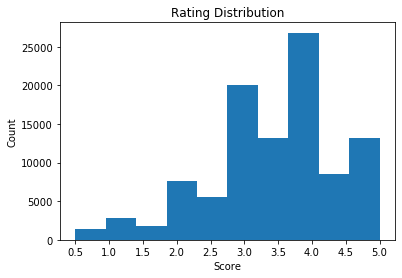

In [60]:
plt.hist(rating_data['rating'])
plt.title('Rating Distribution')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(np.arange(0.5, 5.5, 0.5));

In [61]:
users = list(rating_data['userId'].unique())
items = list(rating_data['movieId'].unique())

def movie_id_to_name(mid):
    return movies.loc[movies['movieId']==mid].title
movie_id_to_name(1371)

1054    Star Trek: The Motion Picture (1979)
Name: title, dtype: object

# Aproximaciones con los modelos de Surprise

In [62]:
# #reader = Reader(rating_scale= (0.5,5))
reader = Reader(rating_scale= (0.5,5),line_format='user item rating timestamp',sep=',')
data_full = Dataset.load_from_df(rating_data[['userId','movieId','rating']], reader=reader)

# # data_train = Dataset.load_from_df(rating_data_train[['userId','movieId','rating']], reader=reader)
# # data_test=Dataset.load_from_df(rating_data_test[['userId','movieId','rating']], reader=reader)

In [63]:
# benchmark_train = []
# benchmark_test = []

# for algoritmo in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:

#     resultados_train = cross_validate(algoritmo, data_train, measures=['RMSE','MAE'], cv=3, verbose=False)
#     resultados_test = cross_validate(algoritmo, data_test, measures=['RMSE','MAE'], cv=3, verbose=False)
       
#     tmp_train = pd.DataFrame.from_dict(resultados_train).mean(axis=0)
#     tmp_train = tmp_train.append(pd.Series([str(algoritmo).split(' ')[0].split('.')[-1]], index=['Algoritmo']))
#     benchmark_train.append(tmp_train)

#     tmp_test = pd.DataFrame.from_dict(resultados_test).mean(axis=0)
#     tmp_test = tmp_test.append(pd.Series([str(algoritmo).split(' ')[0].split('.')[-1]], index=['Algoritmo']))
#     benchmark_test.append(tmp_test)


# pd.DataFrame(benchmark_train).set_index('Algoritmo').sort_values('test_rmse')   
# pd.DataFrame(benchmark_test).set_index('Algoritmo').sort_values('test_rmse')   

In [64]:
# benchmark = []

# for algoritmo in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:

#     resultados = cross_validate(algoritmo, data_full, measures=['RMSE','MAE'], cv=3, verbose=False)
 
#     tmp = pd.DataFrame.from_dict(resultados).mean(axis=0)
#     tmp = tmp.append(pd.Series([str(algoritmo).split(' ')[0].split('.')[-1]], index=['Algoritmo']))
#     benchmark.append(tmp)

# pd.DataFrame(benchmark).set_index('Algoritmo').sort_values('test_rmse')   

# SVD MODEL - Single Value Descomposition

In [65]:
#reader = Reader(rating_scale= (0.5,5))
reader = Reader(rating_scale= (0.5,5),line_format='user item rating timestamp',sep=',')
data_test = Dataset.load_from_df(rating_data_test[['userId','movieId','rating']], reader=reader)
data_train = Dataset.load_from_df(rating_data_train[['userId','movieId','rating']], reader=reader)

In [66]:
svd_model = SVD(n_epochs=20,lr_all=0.005,reg_all=0.02,verbose=False)
cross_validate(svd_model, data_train, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8910  0.8883  0.8865  0.8859  0.8836  0.8871  0.0025  
MAE (testset)     0.6849  0.6832  0.6814  0.6831  0.6802  0.6826  0.0016  
Fit time          5.60    5.15    6.68    5.17    5.27    5.58    0.58    
Test time         0.14    0.18    0.16    0.26    0.14    0.18    0.04    


{'test_rmse': array([0.89096692, 0.8882613 , 0.88651382, 0.88594653, 0.88357704]),
 'test_mae': array([0.6848942 , 0.68321453, 0.68137755, 0.68308418, 0.68018315]),
 'fit_time': (5.604545593261719,
  5.151822805404663,
  6.68388032913208,
  5.165815114974976,
  5.270750999450684),
 'test_time': (0.1429121494293213,
  0.17889165878295898,
  0.1589064598083496,
  0.2598412036895752,
  0.1409134864807129)}

In [67]:
#trainset, testset = train_test_split(data_full, train_size=0.75,shuffle=True)
svd_model = SVD(n_epochs=20,lr_all=0.005,reg_all=0.02,verbose=False)
svd_model.fit(data_train.build_full_trainset())
# svd_model.fit(trainset)

In [68]:
# predictions = svd_model.test(testset)

predictions = svd_model.test(data_test.build_full_trainset().build_testset())
accuracy.rmse(predictions),accuracy.mae(predictions)


RMSE: 0.8705
MAE:  0.6700


(0.8705482601893809, 0.670035887795179)

In [69]:
#trainset

In [70]:
# predictions

In [71]:
# trainset.ur

In [72]:
# for rating in trainset.all_ratings():
#     print(rating)

In [73]:
# # save the model to disk

# filename = '../pickle_models/svd_first_model.sav'
# pickle.dump(svd_model, open(filename, 'wb'))

In [74]:
# loaded_model = pickle.load(open(filename, 'rb'))
# loaded_

# Cross-Validation for SVD

In [75]:
param_grid_svd = {'n_factors':[20,40,60,80,100],'n_epochs': [5,10], 'lr_all': [0.002, 0.005], 'reg_all': [0.02,0.04]}

In [76]:
gs_svd = GridSearchCV(SVD, param_grid_svd, measures=['mae',"rmse", 'fcp'], cv=5, refit=True)

In [77]:
gs_svd.fit(data_train)

In [78]:
gs_svd.best_score

{'mae': 0.6846808344349095,
 'rmse': 0.887522506462119,
 'fcp': 0.6465042137104334}

In [79]:
gs_svd.best_params

{'mae': {'n_factors': 20, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.04},
 'rmse': {'n_factors': 20, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.04},
 'fcp': {'n_factors': 60, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.04}}

In [80]:
gs_svd.best_estimator

{'mae': <surprise.prediction_algorithms.matrix_factorization.SVD at 0x1912e6ed748>,
 'rmse': <surprise.prediction_algorithms.matrix_factorization.SVD at 0x1912e6ed5c0>,
 'fcp': <surprise.prediction_algorithms.matrix_factorization.SVD at 0x1912e6ed518>}

In [81]:
# data_full.build_full_trainset()


In [82]:
# best_model = SVD(n_epochs=gs1.best_params['mae']['n_epochs'],
#                  lr_all=gs1.best_params['mae']['lr_all'],
#                  reg_all=gs1.best_params['mae']['reg_all'],
#                  verbose=False)
# best_model.fit(data_train.build_full_trainset())
# best_predictions = best_model.test(data_test.build_full_trainset().build_anti_testset())


In [83]:
gs_svd.best_score

{'mae': 0.6846808344349095,
 'rmse': 0.887522506462119,
 'fcp': 0.6465042137104334}

In [84]:
SVD_score = gs_svd.best_score
SVD_score['model']='SVD'
scores=[]
scores.append(SVD_score)
results = pd.DataFrame(scores,columns=['model','fcp','mae','rmse'])
results

,model,fcp,mae,rmse
0,SVD,0.646504,0.684681,0.887523


## NMF

In [85]:
paramgrid_nmf = {'n_factors':[20,40,60,80,100],'n_epochs': [5,10]}

In [86]:
gs_nmf = GridSearchCV(NMF, paramgrid_nmf, measures=['mae',"rmse", 'fcp'], cv=5, refit=True)

In [87]:
gs_nmf.fit(data_train)

In [88]:
gs_nmf.best_score

{'mae': 0.9416080087975965,
 'rmse': 1.2145904698273735,
 'fcp': 0.6341597107295865}

In [89]:
gs_nmf.best_params

{'mae': {'n_factors': 20, 'n_epochs': 10},
 'rmse': {'n_factors': 20, 'n_epochs': 10},
 'fcp': {'n_factors': 20, 'n_epochs': 10}}

In [90]:
gs_nmf.best_estimator

{'mae': <surprise.prediction_algorithms.matrix_factorization.NMF at 0x1912fcfa518>,
 'rmse': <surprise.prediction_algorithms.matrix_factorization.NMF at 0x1912fcfada0>,
 'fcp': <surprise.prediction_algorithms.matrix_factorization.NMF at 0x1912fcfa630>}

In [91]:
gs_nmf.best_score

{'mae': 0.9416080087975965,
 'rmse': 1.2145904698273735,
 'fcp': 0.6341597107295865}

In [92]:
NMF_score = gs_nmf.best_score
NMF_score['model']='NMF'
scores.append(NMF_score)
results = pd.DataFrame(scores,columns=['model','fcp','mae','rmse'])
results

,model,fcp,mae,rmse
0,SVD,0.646504,0.684681,0.887523
1,NMF,0.634160,0.941608,1.214590


# KNN inspired models

## KNNBasic

In [93]:
# testset_model_surprise = surprise.Dataset.load_from_df(data_full, reader).build_full_trainset()
# trainset_model_surprise = surprise.Dataset.load_from_df(data_full, reader).build_full_trainset()

# testset = testset_model_surprise.build_testset()
# predictions = knn_basic_gs.fit(trainset_model_surprise).test(testset)


In [94]:
# #corremos el KNNBasic con los parámetros predefinidos por el modelo
# knn_basic = KNNBasic(k=40, sim_options = {'user_based': [True, False]}, verbose=False)
# eval_knn_basic = evaluate(knn_basic, data_full, measures=['RMSE', 'MAE'])


In [95]:
param_grid_KNNBasic =  {'k': [20, 40 ,80, 100], 'sim_options': {'user_based': [True, False]}}


In [96]:
gs_knnbasic = GridSearchCV(KNNBasic, param_grid_KNNBasic, measures=['rmse', 'mae','fcp'], cv=5,joblib_verbose=0)

In [97]:
gs_knnbasic.fit(data_train)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [98]:
gs_knnbasic.best_score

{'rmse': 0.9194168143607561,
 'mae': 0.7068035769345129,
 'fcp': 0.6538921673784814}

In [99]:
gs_knnbasic.best_params

{'rmse': {'k': 80, 'sim_options': {'user_based': False}},
 'mae': {'k': 80, 'sim_options': {'user_based': False}},
 'fcp': {'k': 20, 'sim_options': {'user_based': True}}}

In [100]:
gs_knnbasic.best_estimator

{'rmse': <surprise.prediction_algorithms.knns.KNNBasic at 0x1912fcd6dd8>,
 'mae': <surprise.prediction_algorithms.knns.KNNBasic at 0x1912fcd6198>,
 'fcp': <surprise.prediction_algorithms.knns.KNNBasic at 0x1912fcd6f98>}

In [101]:
knnbasic_score = gs_knnbasic.best_score
knnbasic_score['model']='KNN Basic'
scores.append(knnbasic_score)
results = pd.DataFrame(scores,columns=['model','fcp','mae','rmse'])
results

,model,fcp,mae,rmse
0,SVD,0.646504,0.684681,0.887523
1,NMF,0.634160,0.941608,1.214590
2,KNN Basic,0.653892,0.706804,0.919417


In [102]:
# knn_basic_train= data_full.build_full_trainset()

In [103]:
# print(knn_basic_gs.best_score['rmse'])
# print(knn_basic_gs.best_params['rmse'])
# print(knn_basic_gs.best_estimator['rmse'])

In [104]:
# #sim_optionsKNNBasic = {'name': 'cosine', 'user_based':[True,False]}
 
# param_grid_KNNBasic2 =  {'k': [20, 40 ,80, 100], 'sim_options': {'user_based': [True]},\
#               'bsl_options': {'method': ['als', 'sgd']}}
# knn_basic_gs2 = GridSearchCV(KNNBasic, param_grid_KNNBasic, measures=['rmse', 'mae'], cv=5)

# knn_basic_gs2.fit(data_full)


In [105]:
# print(knn_basic_gs2.best_score['rmse'])
# print(knn_basic_gs2.best_params['rmse'])
# print(knn_basic_gs2.best_estimator['rmse'])

## KNN With Means

In [106]:
param_grid_KNNMeans =  {'k': [20, 40 ,80, 100], 'sim_options': {'user_based': [True, False]}}


In [107]:
gs_knn_means = GridSearchCV(KNNWithMeans, param_grid_KNNMeans, measures=['rmse', 'mae','fcp'], cv=5,joblib_verbose=0)

In [108]:
gs_knn_means.fit(data_train)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [109]:
gs_knn_means.best_score

{'rmse': 0.906760150729348,
 'mae': 0.6917284366225824,
 'fcp': 0.6387956241755208}

In [110]:
gs_knn_means.best_params

{'rmse': {'k': 100, 'sim_options': {'user_based': False}},
 'mae': {'k': 100, 'sim_options': {'user_based': False}},
 'fcp': {'k': 100, 'sim_options': {'user_based': False}}}

In [111]:
gs_knn_means.best_estimator

{'rmse': <surprise.prediction_algorithms.knns.KNNWithMeans at 0x19122050c88>,
 'mae': <surprise.prediction_algorithms.knns.KNNWithMeans at 0x191222445f8>,
 'fcp': <surprise.prediction_algorithms.knns.KNNWithMeans at 0x191222aacc0>}

In [112]:
knn_means_score = gs_knn_means.best_score
knn_means_score['model']='KNN With Means'
scores.append(knn_means_score)
results = pd.DataFrame(scores,columns=['model','fcp','mae','rmse'])
results

,model,fcp,mae,rmse
0,SVD,0.646504,0.684681,0.887523
1,NMF,0.634160,0.941608,1.214590
2,KNN Basic,0.653892,0.706804,0.919417
3,KNN With Means,0.638796,0.691728,0.906760


In [113]:
# knn_withmeans = KNNWithMeans(k=40, sim_options = {'user_based': False}, verbose=False)
# eval_knn_withmeans = evaluate(knn_withmeans, data_full, measures=['RMSE', 'MAE'])

In [114]:
# param_grid_KNNWithMeans = {'k': [40 ,80, 100,150], 'sim_options': {'user_based': [True, False]},\
#               'bsl_options': {'method': ['als', 'sgd']}}
# knn_withmeans_gs = GridSearchCV(KNNWithMeans, param_grid_KNNWithMeans, measures=['rmse', 'mae'], cv=5)
# knn_withmeans_gs.fit(data_full)
# print(knn_withmeans_gs.best_score['rmse'])
# print(knn_withmeans_gs.best_params['rmse'])

## KNN With ZScore

In [115]:
paramgrid_KNN_ZScore =  {'k': [20, 40 ,80, 100], 'sim_options': {'user_based': [True, False]}}


In [116]:
gs_knn_zscore = GridSearchCV(KNNWithZScore, paramgrid_KNN_ZScore, measures=['rmse', 'mae','fcp'], cv=5,joblib_verbose=0)

In [117]:
gs_knn_zscore.fit(data_train)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [118]:
gs_knn_zscore.best_score

{'rmse': 0.913103561203253,
 'mae': 0.6926273071784358,
 'fcp': 0.6323516680194362}

In [119]:
gs_knn_zscore.best_params

{'rmse': {'k': 100, 'sim_options': {'user_based': False}},
 'mae': {'k': 80, 'sim_options': {'user_based': True}},
 'fcp': {'k': 100, 'sim_options': {'user_based': False}}}

In [120]:
gs_knn_zscore.best_estimator

{'rmse': <surprise.prediction_algorithms.knns.KNNWithZScore at 0x1912fd01278>,
 'mae': <surprise.prediction_algorithms.knns.KNNWithZScore at 0x1912fd01550>,
 'fcp': <surprise.prediction_algorithms.knns.KNNWithZScore at 0x1912fd01940>}

In [121]:
knn_zscore_score = gs_knn_zscore.best_score
knn_zscore_score['model']='KNN With Z-Score'
scores.append(knn_zscore_score)
results = pd.DataFrame(scores,columns=['model','fcp','mae','rmse'])
results

,model,fcp,mae,rmse
0,SVD,0.646504,0.684681,0.887523
1,NMF,0.634160,0.941608,1.214590
2,KNN Basic,0.653892,0.706804,0.919417
3,KNN With Means,0.638796,0.691728,0.906760
4,KNN With Z-Score,0.632352,0.692627,0.913104


## KNN BAseline

In [122]:
# knn_baseline = KNNBaseline(k=40, sim_options = {'user_based': False}, verbose=False)
# eval_knn_baseline = evaluate(knn_baseline, data_full, measures=['RMSE', 'MAE'])

In [123]:
param_grid_KNNBaseline =  {'k': [20, 40 ,80, 100], 'sim_options': {'user_based': [True, False]}}


In [124]:
gs_knnbaseline = GridSearchCV(KNNBaseline, param_grid_KNNBaseline, measures=['rmse', 'mae','fcp'], cv=5,joblib_verbose=0)

In [125]:
gs_knnbaseline.fit(data_train)


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

In [126]:
gs_knnbaseline.best_score

{'rmse': 0.8716755410687529,
 'mae': 0.6677905697878039,
 'fcp': 0.6613140009253531}

In [127]:
gs_knnbaseline.best_params

{'rmse': {'k': 100, 'sim_options': {'user_based': False}},
 'mae': {'k': 100, 'sim_options': {'user_based': False}},
 'fcp': {'k': 100, 'sim_options': {'user_based': False}}}

In [128]:
gs_knnbaseline.best_estimator

{'rmse': <surprise.prediction_algorithms.knns.KNNBaseline at 0x1912fd01ba8>,
 'mae': <surprise.prediction_algorithms.knns.KNNBaseline at 0x1912e6ed470>,
 'fcp': <surprise.prediction_algorithms.knns.KNNBaseline at 0x1912e6ed4e0>}

In [129]:
knn_baseline_score = gs_knnbaseline.best_score
knn_baseline_score['model']='KNN Baseline'
scores.append(knn_baseline_score)
results = pd.DataFrame(scores,columns=['model','fcp','mae','rmse'])
results

,model,fcp,mae,rmse
0,SVD,0.646504,0.684681,0.887523
1,NMF,0.634160,0.941608,1.214590
2,KNN Basic,0.653892,0.706804,0.919417
3,KNN With Means,0.638796,0.691728,0.906760
4,KNN With Z-Score,0.632352,0.692627,0.913104
5,KNN Baseline,0.661314,0.667791,0.871676


In [130]:

# print(knn_baseline_gs.best_score['rmse'])
# print(knn_baseline_gs.best_params['rmse'])

# Co-clustering

In [131]:
# co_clustering = CoClustering(n_cltr_u=3, n_cltr_i=3 , n_epochs=20, random_state=12)
# eval_co_clustering = evaluate(co_clustering, data_full, measures=['RMSE', 'MAE'])

In [132]:
param_grid_co_clustering = {'n_cltr_u': [3, 5, 10, 15], 'n_cltr_i': [3, 5,10, 15], 'n_epochs':[5,10]}

In [133]:
gs_coclustering = GridSearchCV(CoClustering, param_grid_co_clustering, measures=['rmse', 'mae','fcp'], cv=5)

In [134]:
gs_coclustering.fit(data_train)

In [135]:
gs_coclustering.best_score

{'rmse': 0.9620976879139775,
 'mae': 0.7441746062245173,
 'fcp': 0.6216885987335394}

In [136]:
gs_coclustering.best_params

{'rmse': {'n_cltr_u': 3, 'n_cltr_i': 3, 'n_epochs': 10},
 'mae': {'n_cltr_u': 5, 'n_cltr_i': 3, 'n_epochs': 10},
 'fcp': {'n_cltr_u': 15, 'n_cltr_i': 3, 'n_epochs': 10}}

In [137]:
gs_coclustering.best_estimator

{'rmse': <surprise.prediction_algorithms.co_clustering.CoClustering at 0x1912fd54f60>,
 'mae': <surprise.prediction_algorithms.co_clustering.CoClustering at 0x1912fd54e10>,
 'fcp': <surprise.prediction_algorithms.co_clustering.CoClustering at 0x1912fd549e8>}

In [138]:
coclustering_score = gs_coclustering.best_score
coclustering_score['model']='Co-Clustering'
scores.append(coclustering_score)
results = pd.DataFrame(scores,columns=['model','fcp','mae','rmse'])
results

,model,fcp,mae,rmse
0,SVD,0.646504,0.684681,0.887523
1,NMF,0.634160,0.941608,1.214590
2,KNN Basic,0.653892,0.706804,0.919417
3,KNN With Means,0.638796,0.691728,0.906760
4,KNN With Z-Score,0.632352,0.692627,0.913104
5,KNN Baseline,0.661314,0.667791,0.871676
6,Co-Clustering,0.621689,0.744175,0.962098


In [ ]:
# print(co_clustering_gs.best_score['rmse'])
# print(co_clustering_gs.best_params['rmse'])

In [166]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

def get_user_recommendations(uid,top_n):
    titles=[]
    for mid,_ in top_n[uid]:
        titles.append((mid,movies.loc[movies['movieId']==mid,'title'].values[0]))
    return titles

In [ ]:
# # First train an SVD algorithm on the movielens dataset.
# trainset = data_sp.build_full_trainset()
# best_model = SVD(n_epochs=gs1.best_params['rmse']['n_epochs'],lr_all=gs1.best_params['rmse']['lr_all'],reg_all=gs1.best_params['rmse']['reg_all'],verbose=False)
# best_model.fit(trainset)

# # Than predict ratings for all pairs (u, i) that are NOT in the training set.
# testset = trainset.build_anti_testset()
# predictions = best_model.test(testset)

## Best Matrix Factorization Model: SVD

In [139]:
best_SVD = gs_svd.best_estimator['mae']
best_SVD.fit(data_train.build_full_trainset())

In [195]:
SVD_predictions = best_SVD.test(data_test.build_full_trainset().build_anti_testset())
#SVD_predictions

In [196]:
accuracy.mae(SVD_predictions)

MAE:  0.3221


0.32205279761508565

In [197]:
top_n_SVD = get_top_n(SVD_predictions, n=10)
for uid, user_ratings in top_n_SVD.items():
    print(uid, [iid for (iid, _) in user_ratings])

474 [318, 912, 2959, 1089, 858, 904, 1198, 750, 1213, 48516]
21 [318, 1204, 1213, 912, 1089, 2329, 50, 1136, 1198, 48516]
465 [318, 50, 1213, 48516, 1089, 2959, 858, 1204, 1198, 912]
590 [318, 50, 912, 2959, 904, 1198, 1213, 48516, 858, 6711]
40 [1136, 318, 50, 1089, 2959, 1204, 912, 750, 6711, 48516]
606 [318, 912, 1136, 2959, 1193, 48516, 1213, 6711, 1196, 1221]
182 [318, 2959, 48516, 1204, 1136, 1089, 1213, 2329, 750, 1221]
100 [318, 50, 2959, 2571, 912, 1204, 1089, 1213, 48516, 1136]
354 [318, 912, 2329, 1213, 858, 1089, 2571, 1208, 1221, 1198]
599 [318, 2959, 50, 48516, 904, 1089, 912, 750, 1136, 858]
339 [1204, 2959, 1196, 50, 912, 1198, 48516, 750, 2571, 527]
279 [318, 2959, 750, 912, 1136, 1089, 50, 1204, 904, 858]
136 [318, 2959, 50, 1089, 1193, 904, 48516, 1204, 858, 1136]
274 [318, 2959, 50, 750, 1204, 48516, 904, 1213, 1136, 1196]
610 [1136, 50, 1204, 1196, 904, 6711, 1089, 1198, 1193, 260]
380 [318, 1089, 912, 50, 904, 2959, 1136, 858, 1213, 58559]
68 [318, 912, 1204, 1198

In [198]:
get_user_recommendations(474,top_n_SVD)

[(318, 'Shawshank Redemption, The (1994)'),
 (912, 'Casablanca (1942)'),
 (2959, 'Fight Club (1999)'),
 (1089, 'Reservoir Dogs (1992)'),
 (858, 'Godfather, The (1972)'),
 (904, 'Rear Window (1954)'),
 (1198,
  'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'),
 (750,
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)'),
 (1213, 'Goodfellas (1990)'),
 (48516, 'Departed, The (2006)')]

In [199]:
get_user_recommendations(320,top_n_SVD)

[(318, 'Shawshank Redemption, The (1994)'),
 (912, 'Casablanca (1942)'),
 (1204, 'Lawrence of Arabia (1962)'),
 (6711, 'Lost in Translation (2003)'),
 (2329, 'American History X (1998)'),
 (2959, 'Fight Club (1999)'),
 (858, 'Godfather, The (1972)'),
 (1208, 'Apocalypse Now (1979)'),
 (1198,
  'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'),
 (50, 'Usual Suspects, The (1995)')]

In [202]:
get_user_recommendations(120,top_n_SVD)

[(318, 'Shawshank Redemption, The (1994)'),
 (1089, 'Reservoir Dogs (1992)'),
 (50, 'Usual Suspects, The (1995)'),
 (912, 'Casablanca (1942)'),
 (1136, 'Monty Python and the Holy Grail (1975)'),
 (2959, 'Fight Club (1999)'),
 (4226, 'Memento (2000)'),
 (750,
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)'),
 (858, 'Godfather, The (1972)'),
 (1198,
  'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)')]

In [203]:
get_user_recommendations(230,top_n_SVD)

[(1204, 'Lawrence of Arabia (1962)'),
 (1089, 'Reservoir Dogs (1992)'),
 (1196, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
 (50, 'Usual Suspects, The (1995)'),
 (2959, 'Fight Club (1999)'),
 (1198,
  'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'),
 (858, 'Godfather, The (1972)'),
 (1136, 'Monty Python and the Holy Grail (1975)'),
 (912, 'Casablanca (1942)'),
 (1213, 'Goodfellas (1990)')]

## Best KNN Based Model: KNN Baseline

In [152]:
best_KNN = gs_knnbaseline.best_estimator['mae']
best_KNN.fit(data_train.build_full_trainset())

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [204]:
KNN_predictions = best_KNN.test(data_test.build_full_trainset().build_anti_testset())

In [205]:
accuracy.mae(KNN_predictions)

MAE:  0.4024


0.40244824085415226

In [206]:
top_n_KNN = get_top_n(KNN_predictions, n=10)
for uid, user_ratings in top_n_KNN.items():
    print(uid, [iid for (iid, _) in user_ratings])

474 [318, 858, 3451, 1221, 7153, 7361, 912, 527, 1136, 906]
21 [78637, 101864, 356, 1196, 7573, 68954, 135887, 47997, 260, 78499]
465 [318, 912, 1204, 2959, 858, 1136, 750, 50, 1089, 48516]
590 [318, 858, 912, 904, 3451, 1208, 50, 1262, 1198, 1276]
40 [318, 112421, 1718, 127298, 166024, 2959, 1341, 170705, 5890, 858]
606 [2959, 912, 1193, 898, 1208, 527, 2571, 1196, 593, 296]
182 [318, 2959, 1213, 912, 1172, 1411, 2329, 6711, 1104, 1089]
100 [318, 50, 858, 58559, 48516, 2959, 356, 2329, 912, 1213]
354 [318, 858, 1136, 912, 48516, 1213, 527, 58559, 2571, 1089]
599 [1178, 318, 3468, 3503, 951, 6711, 720, 912, 1089, 2959]
339 [56782, 7156, 527, 6016, 858, 1193, 608, 1252, 92259, 48516]
279 [2669, 318, 1136, 2959, 1196, 260, 1204, 56782, 858, 541]
136 [155820, 152091, 106062, 159441, 5890, 8405, 5867, 2442, 5951, 6023]
274 [318, 1089, 2959, 2329, 1193, 58559, 50, 4226, 1213, 48516]
610 [3328, 1208, 68157, 1258, 1196, 260, 1221, 904, 296, 7387]
380 [1617, 1221, 7387, 49272, 58559, 78499, 75

In [207]:
get_user_recommendations(474,top_n_KNN)

[(318, 'Shawshank Redemption, The (1994)'),
 (858, 'Godfather, The (1972)'),
 (3451, "Guess Who's Coming to Dinner (1967)"),
 (1221, 'Godfather: Part II, The (1974)'),
 (7153, 'Lord of the Rings: The Return of the King, The (2003)'),
 (7361, 'Eternal Sunshine of the Spotless Mind (2004)'),
 (912, 'Casablanca (1942)'),
 (527, "Schindler's List (1993)"),
 (1136, 'Monty Python and the Holy Grail (1975)'),
 (906, 'Gaslight (1944)')]

In [208]:
get_user_recommendations(610,top_n_KNN)

[(3328, 'Ghost Dog: The Way of the Samurai (1999)'),
 (1208, 'Apocalypse Now (1979)'),
 (68157, 'Inglourious Basterds (2009)'),
 (1258, 'Shining, The (1980)'),
 (1196, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
 (260, 'Star Wars: Episode IV - A New Hope (1977)'),
 (1221, 'Godfather: Part II, The (1974)'),
 (904, 'Rear Window (1954)'),
 (296, 'Pulp Fiction (1994)'),
 (7387, 'Dawn of the Dead (1978)')]

In [209]:
get_user_recommendations(120,top_n_KNN)

[(117192, 'Doctor Who: The Time of the Doctor (2013)'),
 (87234, 'Submarine (2010)'),
 (26810, 'Bad Boy Bubby (1993)'),
 (112421, 'Frank (2014)'),
 (100507, '21 and Over (2013)'),
 (174053, 'Black Mirror: White Christmas (2014)'),
 (26116, 'Hush... Hush, Sweet Charlotte (1964)'),
 (7767, 'Best of Youth, The (La meglio gioventù) (2003)'),
 (127298, 'A Pigeon Sat on a Branch Reflecting on Existence (2014)'),
 (172591, 'The Godfather Trilogy: 1972-1990 (1992)')]

In [210]:
get_user_recommendations(230,top_n_KNN)

[(166291, 'A Silent Voice (2016)'),
 (164917, '13th (2016)'),
 (5447, 'Sunshine State (2002)'),
 (49389, 'The Great Train Robbery (1903)'),
 (109569, '3 Days to Kill (2014)'),
 (104074, 'Percy Jackson: Sea of Monsters (2013)'),
 (82041, 'Loved Ones, The (2009)'),
 (84189, 'I Spit on Your Grave (2010)'),
 (108188, 'Jack Ryan: Shadow Recruit (2014)'),
 (86059, 'Hop (2011)')]

## Best Co-Clustering

In [155]:
best_co = gs_coclustering.best_estimator['mae']
best_co.fit(data_train.build_full_trainset())

In [190]:
co_predictions = best_co.test(data_test.build_full_trainset().build_anti_testset())


In [191]:
accuracy.mae(co_predictions)

MAE:  0.5930


0.5930009152493572

In [192]:
top_n_co = get_top_n(co_predictions, n=10)
for uid, user_ratings in top_n_co.items():
    print(uid, [iid for (iid, _) in user_ratings])

474 [627, 4956, 1699, 1105, 100882, 549, 53, 174053, 73290, 101765]
21 [627, 4956, 1699, 1105, 100882, 549, 53, 174053, 73290, 101765]
465 [1172, 50, 2329, 71462, 260, 608, 1221, 593, 162578, 3019]
590 [627, 4956, 1699, 1105, 100882, 549, 53, 174053, 73290, 101765]
40 [627, 7767, 78836, 4956, 1564, 95654, 1699, 1104, 1178, 1105]
606 [4956, 1699, 1105, 100882, 48342, 549, 53, 26116, 5890, 174053]
182 [7767, 78836, 1564, 95654, 1545, 73042, 2511, 3546, 26547, 58655]
100 [627, 7767, 78836, 4956, 1564, 95654, 8838, 1699, 2670, 6666]
354 [627, 7767, 78836, 4956, 1564, 95654, 1699, 1105, 1545, 73042]
599 [4956, 1699, 1105, 100882, 549, 53, 174053, 73290, 101765, 4708]
339 [627, 7767, 78836, 4956, 1564, 95654, 8838, 1699, 2670, 6666]
279 [627, 7767, 78836, 4956, 1564, 95654, 1699, 1105, 1545, 73042]
136 [7767, 78836, 1564, 95654, 1545, 73042, 2511, 3546, 26547, 58655]
274 [627, 4956, 1699, 1105, 100882, 549, 53, 174053, 73290, 101765]
610 [627, 4956, 1699, 1105, 100882, 48342, 549, 53, 26116,

In [193]:
get_user_recommendations(474,top_n_co)

[(627, 'Last Supper, The (1995)'),
 (4956, 'Stunt Man, The (1980)'),
 (1699, 'Butcher Boy, The (1997)'),
 (1105, 'Children of the Corn IV: The Gathering (1996)'),
 (100882,
  'Journey to the West: Conquering the Demons (Daai wa sai you chi Chui mo chun kei) (2013)'),
 (549, 'Thirty-Two Short Films About Glenn Gould (1993)'),
 (53, 'Lamerica (1994)'),
 (174053, 'Black Mirror: White Christmas (2014)'),
 (73290, "Hachiko: A Dog's Story (a.k.a. Hachi: A Dog's Tale) (2009)"),
 (101765, 'Perfect Plan, A (Plan parfait, Un) (2012)')]

In [194]:
get_user_recommendations(120,top_n_co)

[(7767, 'Best of Youth, The (La meglio gioventù) (2003)'),
 (78836, 'Enter the Void (2009)'),
 (1564, "For Roseanna (Roseanna's Grave) (1997)"),
 (95654, "Geri's Game (1997)"),
 (1545, 'Ponette (1996)'),
 (73042, 'Alvin and the Chipmunks: The Squeakquel (2009)'),
 (2511, 'Long Goodbye, The (1973)'),
 (3546, 'What Ever Happened to Baby Jane? (1962)'),
 (26547, 'Police Story (Ging chaat goo si) (1985)'),
 (58655, 'Drillbit Taylor (2008)')]

In [ ]:
get_user_recommendations(230,top_n_co)

In [ ]:
# top_n = get_top_n(best_predictions, n=5)

In [ ]:
# for uid, user_ratings in top_n.items():
#     print(uid, [iid for (iid, _) in user_ratings])

In [ ]:
# preds = pd.DataFrame(best_predictions)
# preds['err']=abs(preds['r_ui']-preds['est'])
# preds

In [ ]:
# #las 5 películas recomendadas para el usuario 1
# df_1 = rating_data[rating_data['userId'] == 1]
# df_1 = df_1.set_index('movieId')
# df_1 = df_1.join(movies, how="left")['title']
# print(df_1.sort_index().head(5))

# # me dá el index gral no el de las pelis, está corrido 1 lugar

In [ ]:
# user_1_svd = movies[['movieId', 'title']]
# user_1_svd['Estimate_Score'] = user_1_svd['movieId'].apply(lambda x: gs1.predict('1', x).est)
# user_1_svd = user_1_svd.drop('movieId', axis = 1)
# user_1_svd = user_1_svd.sort_values('Estimate_Score', ascending=False)
# print(user_1_svd.head(10))

Tendriamos que ver la prediccion y el estimado para el usuario 1

In [ ]:
# cv_results_svd = pd.DataFrame(gs1.cv_results)
# fig = plt.figure(figsize=(15, 6))
# plt.subplot(121)
# plt.plot(cv_results_svd['mean_test_rmse'])
# plt.xticks(np.arange(10), np.arange(70, 170, 10), fontsize=13)
# plt.yticks(fontsize=13)
# plt.xlabel('number of latent factors', fontsize=16)
# plt.ylabel('Root Mean Square Error (RMSE)', fontsize=16)
# plt.grid()
# plt.legend()
# plt.subplot(122)
# plt.plot(cv_results_svd['mean_test_mae'])
# plt.xticks(np.arange(10), np.arange(70, 170, 10), fontsize=13)
# plt.yticks(fontsize=13)
# plt.xlabel('number of latent factors', fontsize=16)
# plt.ylabel('Mean Absolute Error (MAE)', fontsize=16)
# plt.grid()
# plt.legend()
# plt.show()